In [1]:
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import nltk

In [2]:
df = pd.read_csv('nyc-jobs.csv', encoding = 'UTF-8')

In [3]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-02T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-02T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-02T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-02T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-02T00:00:00.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 28 columns):
Job ID                           3207 non-null int64
Agency                           3207 non-null object
Posting Type                     3207 non-null object
# Of Positions                   3207 non-null int64
Business Title                   3207 non-null object
Civil Service Title              3207 non-null object
Title Code No                    3207 non-null object
Level                            3207 non-null object
Job Category                     3205 non-null object
Full-Time/Part-Time indicator    2931 non-null object
Salary Range From                3207 non-null float64
Salary Range To                  3207 non-null float64
Salary Frequency                 3207 non-null object
Work Location                    3207 non-null object
Division/Work Unit               3207 non-null object
Job Description                  3207 non-null object
Minimum Qual Requirements    

In [5]:
def parse_keywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)

In [6]:
def parse_categories(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    key_categories.extend(l)


In [7]:
df.drop(['Recruitment Contact', 'Post Until'], axis=1, inplace=True)
df.columns = ['id', 'agency', 'posting_type', 'number_of_positions', 'business_title', 'civil_service_title', 'title_code_number', 'level', 'job_category', 'full-time/part-time', 'salary_range_low', 'salary_range_high', 'salary_frequency', 'work_location', 'work_unit', 'job_description', 'minimum_requirements', 'preferred_skills', 'additional_info', 'to_apply', 'shift', 'work_location_1', 'residency_requirement', 'posting_date', 'posting_updated', 'process_date' ]

In [8]:
df.job_category.value_counts()

Engineering, Architecture, & Planning                                                                                                            531
Technology, Data & Innovation                                                                                                                    325
Public Safety, Inspections, & Enforcement                                                                                                        239
Building Operations & Maintenance                                                                                                                191
Health                                                                                                                                           181
Legal Affairs                                                                                                                                    176
Constituent Services & Community Programs                                                                 

In [9]:
key_categories = []
df.job_category.dropna().apply(parse_categories)
key_categories = pd.Series(key_categories)
key_categories = key_categories[key_categories!='']
popular_categories = key_categories.value_counts().iloc[:25]

In [10]:
p = "YlGnBu"
p2 = "YlGn"
p3 = "Greys"

## Full time or Part time?

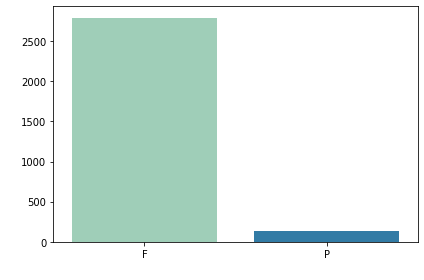

In [11]:
sns.countplot(x='full-time/part-time', data=df, palette=p)
plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.savefig('full-part-job.pdf')

In [12]:
2793/3207


0.8709073900841908

## Salary frequency

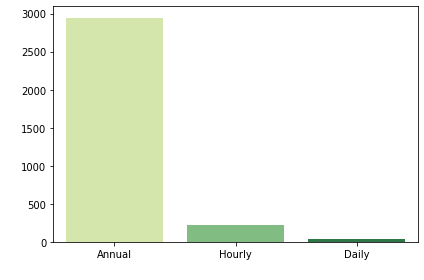

In [13]:
sns.countplot(x='salary_frequency', data=df, palette=p2)
plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.savefig('salary_frequency.pdf')

In [14]:
df.salary_frequency.value_counts()

Annual    2948
Hourly     227
Daily       32
Name: salary_frequency, dtype: int64

In [15]:
2948/3207

0.9192391643280324

## Most in-demand job categories

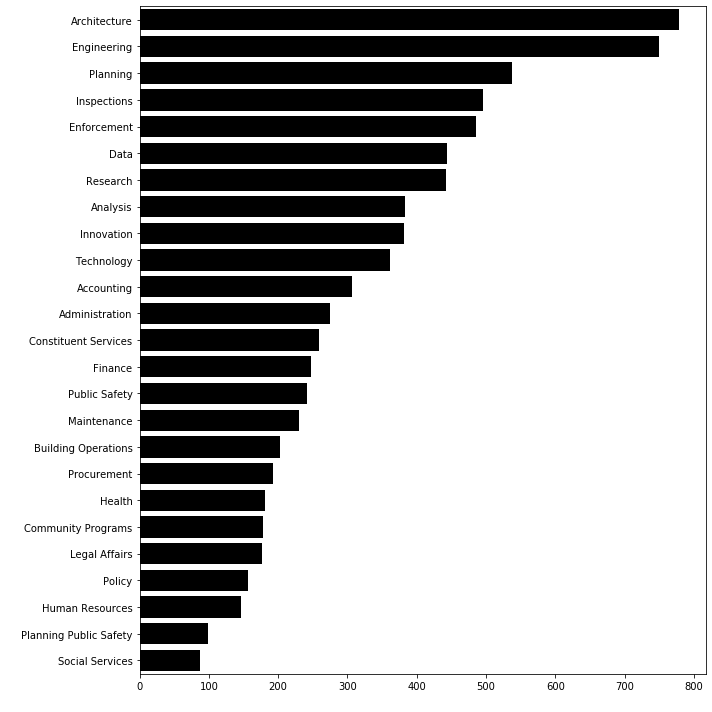

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(y=key_categories, order=popular_categories.index, color="black")

plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.savefig('in-demand-job.pdf')

## Most popular job titles

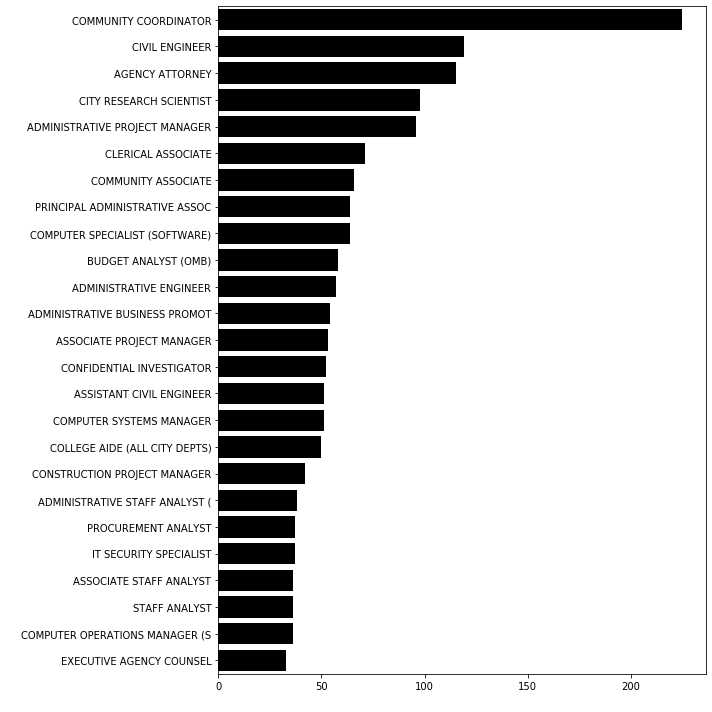

In [17]:
plt.figure(figsize=(10,10))
titles_freq = df.civil_service_title.value_counts()
popular_titles = titles_freq.iloc[:25]
sns.countplot(y="civil_service_title", 
              data=df, order=popular_titles.index, 
              color='black')
plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.savefig('shdjfk.pdf')

## Jobs with highest low salary range (annual)

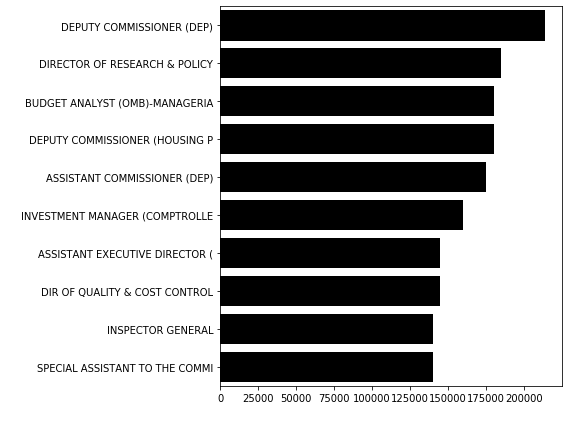

In [18]:
salary_table = df[['civil_service_title', 'salary_range_low', 'salary_range_high']]
jobs_highest_low_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_low'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_low', data=jobs_highest_low_range, color = 'black')

plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.savefig('highest low salary range.pdf')

## Jobs with highest high salary range (annual)

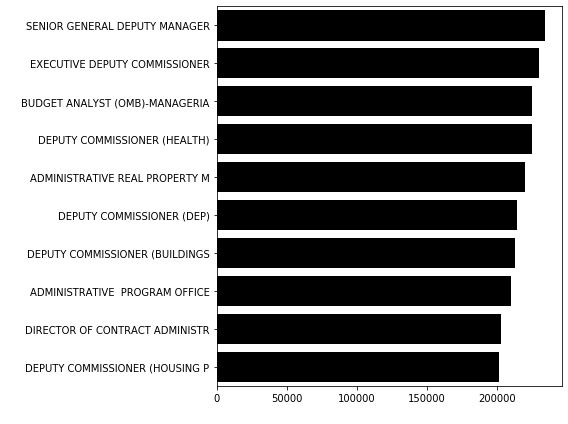

In [19]:
jobs_highest_high_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range, color = 'black')


plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.savefig('highest high salary range.pdf')

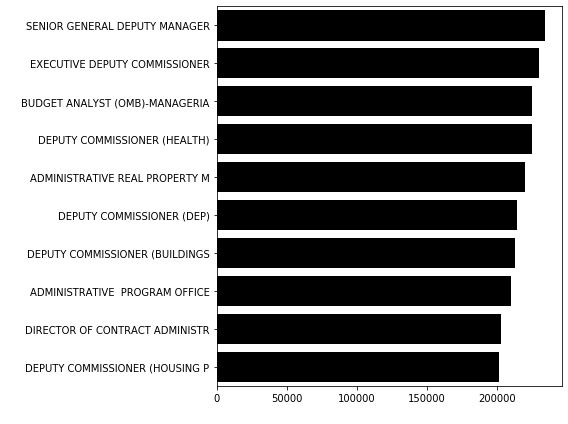

In [20]:
hourly_jobs = df[df.salary_frequency == 'Annual']
jobs_highest_high_range_hourly = pd.DataFrame(hourly_jobs.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range_hourly, color = 'black')

plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.savefig('hourly_salary.pdf')

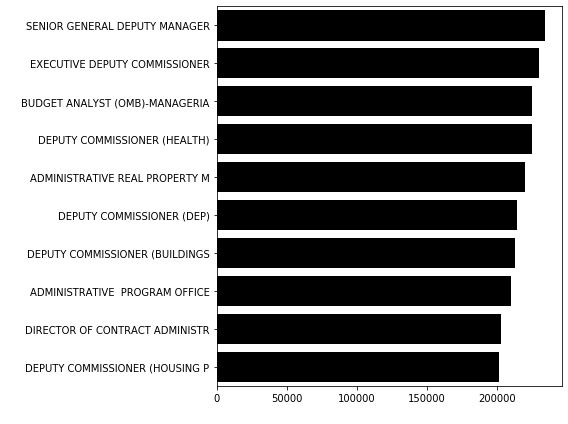

In [21]:
hourly_jobs = df[df.salary_frequency == 'Annual']
jobs_highest_high_range_hourly = pd.DataFrame(hourly_jobs.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range_hourly, color = 'black')

plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.savefig('annually_salary.pdf')